In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import scipy
import scipy.stats as stats

In [2]:
import re

from sklearn.compose import ColumnTransformer #for selecting specific columns and transf
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler #specific transformations
from sklearn.preprocessing import OneHotEncoder #specific transformations
from sklearn.preprocessing import OrdinalEncoder #specific transformations
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import KBinsDiscretizer
#from sklearn.model_selection import StratifiedShuffleSplit

pd.options.display.max_columns = None

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix

In [5]:
# Import the files for modeling

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive
%cd MyDrive
%cd 'Data Science Group Project - Big Data Course'

Mounted at /content/drive
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Data Science Group Project - Big Data Course


In [6]:
c = pd.read_csv('completed_matches.csv').drop('Unnamed: 0', axis=1) # completed_matches
u = pd.read_csv('upcoming_matches.csv').drop('Unnamed: 0', axis=1) # upcoming matches
p = pd.read_csv('players.csv').drop('Unnamed: 0', axis=1) # players

df = c.copy()
df

,player_1_name,player_2_name,weight_class,win,duration,kd,o_kd,ss_hit,ss_att,o_ss_hit,o_ss_att,ss_perc,o_ss_perc,s_hit,s_att,o_s_att,o_s_hit,td_hit,td_att,o_td_hit,o_td_att,td_perc,o_td_perc,sub_att,o_sub_att,rev,o_rev,ctrl,o_ctrl,ss_head_hit,ss_head_att,o_ss_head_hit,o_ss_head_att,ss_body_hit,ss_body_att,o_ss_body_hit,o_ss_body_att,ss_leg_hit,ss_leg_att,o_ss_leg_hit,o_ss_leg_att,ss_dist_hit,ss_dist_att,o_ss_dist_hit,o_ss_dist_att,ss_clinch_hit,ss_clinch_att,o_ss_clinch_hit,o_ss_clinch_att,ss_ground_hit,ss_ground_att,o_ss_ground_hit,o_ss_ground_att,player_1_url,player_2_url,match_url,event_date,event_month,event_year,wins_diff,losses_diff,ties_diff,nc_diff,total_matches_diff,height_diff,weight_diff,reach_diff,stance_diff,age_diff,ss_diff,ss_acc_diff,ss_abs_diff,ss_def_diff,td_diff,td_acc_diff,td_def_diff,sub_diff,prev_diff
0,Tony Ferguson,Justin Gaethje,Lightweight,0,25,0,0,136,296,143,197,0.45,0.72,136,296,197,143,0,0,0,0,0.00,0.00,0,0,0,0,0,0,64,212,100,153,36,43,13,14,36,41,30,30,136,296,143,197,0,0,0,0,0,0,0,0,http://ufcstats.com/fighter-details/22a92d7f62...,http://ufcstats.com/fighter-details/9e8f6c728e...,http://ufcstats.com/fight-details/d395828f5cb0...,"May 09, 2020","09,",2020,3,4,0,0,7,0.0,0.0,6.0,0,4.0,-2.39,-0.15,-3.90,0.03,0.44,0.41,-0.09,1.0,-1
1,Francis Ngannou,Jairzinho Rozenstruik,Heavyweight,1,15,1,0,6,13,5,5,0.46,1.00,6,13,5,5,0,0,0,0,0.00,0.00,0,0,0,0,2,0,5,11,3,3,1,2,0,0,0,0,2,2,3,9,5,5,0,0,0,0,3,4,0,0,http://ufcstats.com/fighter-details/8d03ce87ca...,http://ufcstats.com/fighter-details/2cd428e960...,http://ufcstats.com/fight-details/fcfaa28ed688...,"May 09, 2020","09,",2020,5,-1,0,0,4,2.0,8.0,5.0,0,2.0,-0.47,-0.04,-1.08,-0.04,0.76,0.62,-0.04,0.3,2
2,Anthony Pettis,Donald Cerrone,Lightweight,1,15,0,0,63,113,62,148,0.55,0.41,81,133,148,62,0,1,2,8,0.00,0.25,0,0,0,0,0,106,44,84,31,112,10,18,18,22,9,11,13,14,60,110,59,143,1,1,3,5,2,2,0,0,http://ufcstats.com/fighter-details/1d00756835...,http://ufcstats.com/fighter-details/cbb682f5fc...,http://ufcstats.com/fight-details/b9abcce29378...,"May 09, 2020","09,",2020,12,7,0,2,21,3.0,0.0,1.0,0,4.0,1.36,-0.01,1.04,-0.01,0.55,-0.17,0.13,0.1,-2
3,Carla Esparza,Michelle Waterson-Gomez,Strawweight,1,15,0,0,45,103,44,98,0.43,0.44,48,106,98,44,1,10,0,0,0.10,0.00,0,0,0,0,46,0,34,88,15,60,6,8,13,16,5,7,16,22,39,94,39,92,5,8,5,6,1,1,0,0,http://ufcstats.com/fighter-details/d910665038...,http://ufcstats.com/fighter-details/eb04b9d31e...,http://ufcstats.com/fight-details/f2520dd5457a...,"May 09, 2020","09,",2020,2,-3,0,0,-1,-2.0,0.0,1.0,0,-1.0,-1.44,-0.08,-1.40,0.05,1.79,0.02,-0.20,-0.5,1
4,Vicente Luque,Niko Price,Welterweight,1,15,1,0,130,237,129,291,0.54,0.44,130,237,307,144,0,0,1,4,0.00,0.25,0,0,0,0,25,109,85,186,81,230,8,12,15,25,37,39,33,36,126,229,116,268,1,4,9,19,3,4,4,4,http://ufcstats.com/fighter-details/d8da10db80...,http://ufcstats.com/fighter-details/6d4b63c767...,http://ufcstats.com/fight-details/3f810c3433dd...,"May 09, 2020","09,",2020,-6,-3,-1,2,-8,1.0,0.0,0.0,0,2.0,-0.01,-0.10,0.06,-0.04,0.19,-0.30,0.03,-0.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,Danny Henry,Daniel Teymur,Featherweight,1,15,1,0,93,174,69,129,0.53,0.53,153,243,139,78,1,3,0,2,0.33,0.00,2,0,0,0,353,150,69,139,44,99,18,29,8,8,6,6,17,22,49,118,50,102,6,8,12,18,38,48,7,9,http://ufcstats.com/fighter-details/fbf0537e42...,http://ufcstats.com/fighter-details/f7d73e452b...,http://ufcstats.com/fight-details/a0909aab15ba...,"July 16, 2017","16,",2017,-5,0,0,0,-5,-7.0,0.0,-4.0,0,0.0,-2.12,-0.05,-0.23,0.11,-0.18,-0.15,0.10,-1.9,0
6887,Stevie Ray,Paul Felder,Lightweight,0,15,0,1,5,9,23,35,0.55,0.65,11,15,41,28,0,1,0,0,0.00,0.00,0,0,0,0,105,66,2,6,14,24,2,2,7,9,1,1,2,2,2,4,4,7,3,5,7,10,0,0,12,18,http://ufcstats.com/fighter-details/e

In [7]:
def clean_c(df):

  print('Data cleaning. Starting shape:', df.shape)

  # Counting nan values in all fields
  print('Fill NAs with median of dimension')
  print([(x, y) for x, y in zip(df.isna().sum(), df.isna().sum().index) if x > 0])
  # Fill NAs with the median value of each column
  median_values = df.select_dtypes(include=['int64', 'float64']).median()
  df = df.fillna(median_values)
  print(df.shape)

  print('Remove events befor 2013 for relevance')
  df = df.loc[(df.event_year >= 2013)]

  return df


In [8]:
# DATA CLEANING

df = clean_c(df)

df_final = df.filter(['win','wins_diff','losses_diff'
                      ,'ties_diff','nc_diff','total_matches_diff'
                      ,'height_diff','weight_diff','reach_diff'
                      ,'stance_diff','age_diff','ss_diff'
                      ,'ss_acc_diff','ss_abs_diff','ss_def_diff'
                      ,'td_diff','td_acc_diff','td_def_diff'
                      ,'sub_diff','prev_diff', 'weight_class'])

nonFeatureCol = ['win']

featureCols = [item for item in df_final.columns if item not in nonFeatureCol]
featureCols

df_final.head()


Data cleaning. Starting shape: (6891, 78)
Fill NAs with median of dimension
[(12, 'height_diff'), (9, 'weight_diff'), (1035, 'reach_diff'), (195, 'age_diff')]
(6891, 78)
Remove events befor 2013 for relevance


,win,wins_diff,losses_diff,ties_diff,nc_diff,total_matches_diff,height_diff,weight_diff,reach_diff,stance_diff,age_diff,ss_diff,ss_acc_diff,ss_abs_diff,ss_def_diff,td_diff,td_acc_diff,td_def_diff,sub_diff,prev_diff,weight_class
0,0,3,4,0,0,7,0.0,0.0,6.0,0,4.0,-2.39,-0.15,-3.90,0.03,0.44,0.41,-0.09,1.0,-1,Lightweight
1,1,5,-1,0,0,4,2.0,8.0,5.0,0,2.0,-0.47,-0.04,-1.08,-0.04,0.76,0.62,-0.04,0.3,2,Heavyweight
2,1,12,7,0,2,21,3.0,0.0,1.0,0,4.0,1.36,-0.01,1.04,-0.01,0.55,-0.17,0.13,0.1,-2,Lightweight
3,1,2,-3,0,0,-1,-2.0,0.0,1.0,0,-1.0,-1.44,-0.08,-1.40,0.05,1.79,0.02,-0.20,-0.5,1,Strawweight
4,1,-6,-3,-1,2,-8,1.0,0.0,0.0,0,2.0,-0.01,-0.10,0.06,-0.04,0.19,-0.30,0.03,-0.1,0,Welterweight


In [9]:
# Sort by dtype

dep_var = ['win']

categorical_var = ['weight_class']

continuous_vars = ['wins_diff','losses_diff'
                   ,'ties_diff','nc_diff','total_matches_diff'
                   ,'height_diff','weight_diff','reach_diff'
                   ,'stance_diff','age_diff','ss_diff'
                   ,'ss_acc_diff','ss_abs_diff','ss_def_diff'
                   ,'td_diff','td_acc_diff','td_def_diff'
                   ,'sub_diff','prev_diff']

In [10]:
# IMPUTATION

# Sort by dtype
nonFeatureCol = ['win']

categoricalCol = ['weight_class']

missingValueCols = [y for x, y in zip(df_final.isna().sum(), df_final.isna().sum().index) if x > 0]

#Even if there is missing value in categoricalCol we want to handle it seperately so eliminating from missingValueCols

missingValueCols = [item for item in missingValueCols if item not in (nonFeatureCol + categoricalCol)]

restContinuousCols = [item for item in df_final.columns if item not in nonFeatureCol + categoricalCol + missingValueCols]

restContinuousCols

['wins_diff',
 'losses_diff',
 'ties_diff',
 'nc_diff',
 'total_matches_diff',
 'height_diff',
 'weight_diff',
 'reach_diff',
 'stance_diff',
 'age_diff',
 'ss_diff',
 'ss_acc_diff',
 'ss_abs_diff',
 'ss_def_diff',
 'td_diff',
 'td_acc_diff',
 'td_def_diff',
 'sub_diff',
 'prev_diff']

In [21]:
# ORIGINAL MODEL

#After deciding all the transformers now we'll put them together

# #Missing value handling, it will replace missing values with most frequent value
misVal_si_step = ('si',SimpleImputer(missing_values = np.nan, strategy = 'most_frequent'))
misVal_scl_step = ('scl', MinMaxScaler())

# #Categorical value ordinal encoding
catVal_oe_step = ('oe',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories=[['No weight data','Strawweight','Flyweight','Bantamweight'
                                  ,'Featherweight','Lightweight','Super Lightweight','Welterweight'
                                  ,'Super Welterweight','Middleweight','Super Middleweight'
                                  ,'Light Heavyweight','Cruiserweight','Heavyweight','Super Heavyweight']]))

# #steps getting together
misVal_steps = [misVal_si_step, misVal_scl_step]
misVal_pipe = Pipeline(misVal_steps)
misVal_transformer = [('misVal', misVal_pipe, missingValueCols)]

catVal_steps = [catVal_oe_step]
catVal_pipe = Pipeline(catVal_steps)
catVal_transformer = [('catVal', catVal_pipe, categoricalCol)]

# #For all continuous variables scaling (including missing values columns ones)
conVal_scl_step = ('scl', MinMaxScaler())

conVal_steps = [conVal_scl_step]
conVal_pipe = Pipeline(conVal_steps)
conVal_transformer = [('conVal', conVal_pipe, restContinuousCols)]

#Getting all transformers together
ct = ColumnTransformer(transformers = misVal_transformer + catVal_transformer + conVal_transformer)
ct.fit(df_final[missingValueCols + categoricalCol + restContinuousCols])

#defining X and y
X = ct.transform(df_final[missingValueCols + categoricalCol + restContinuousCols])
y = df_final[nonFeatureCol].values.ravel()

#Split the Dataset, 70% training 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Note that data is already transformed before splitting
# display(X_train)
# display(y_train)


(3327, 20) (1426, 20) (3327,) (1426,)


In [22]:
# # SECOND MODEL: REMOVE WEIGHT CLASS, REMOVE TITLE MATCHES

# SECOND MODEL: REMOVE TITLE MATCHES AND WEIGHT_CLASS

df1 = df.loc[df.duration == 15]

df1_final = df1.filter(['win','wins_diff','losses_diff'
                      ,'ties_diff','nc_diff','total_matches_diff'
                      ,'height_diff','weight_diff','reach_diff'
                      ,'stance_diff','age_diff','ss_diff'
                      ,'ss_acc_diff','ss_abs_diff','ss_def_diff'
                      ,'td_diff','td_acc_diff','td_def_diff'
                      ,'sub_diff','prev_diff'])
df1_final

#Getting all transformers together
ct = ColumnTransformer(transformers = misVal_transformer + conVal_transformer)
ct.fit(df_final[missingValueCols + restContinuousCols])

#defining X and y
X = ct.transform(df1_final[missingValueCols + restContinuousCols]) # 2nd model: removed categoricalCol
y = df1_final[nonFeatureCol].values.ravel()

#Split the Dataset, 70% training 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Note that data is already transformed before splitting
# display(X_train)
# display(y_train)


# THIRD MODEL: REMOVE WEIGHT CLASS, REMOVE TITLE MATCHES, AND ONLY TUNE ON Welterweight (largest sample size)

# df2 = df.loc[(df.duration == 15) & (df.weight_class == 'Welterweight')]

# df2_final = df2.filter(['win','wins_diff','losses_diff'
#                       ,'ties_diff','nc_diff','total_matches_diff'
#                       ,'height_diff','weight_diff','reach_diff'
#                       ,'stance_diff','age_diff','ss_diff'
#                       ,'ss_acc_diff','ss_abs_diff','ss_def_diff'
#                       ,'td_diff','td_acc_diff','td_def_diff'
#                       ,'sub_diff','prev_diff'])
# df2_final

# #Getting all transformers together
# ct = ColumnTransformer(transformers = misVal_transformer + conVal_transformer)
# ct.fit(df2_final[missingValueCols + restContinuousCols]) # removed categoricalCol

# #defining X and y
# X = ct.transform(df2_final[missingValueCols + restContinuousCols]) # removed categoricalCol
# y = df2_final[nonFeatureCol].values.ravel()

# #Split the Dataset, 70% training 30% testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# #Note that data is already transformed before splitting
# # display(X_train)
# # display(y_train)


# FOURTH MODEL: REMOVE WEIGHT CLASS, REMOVE TITLE MATCHES, ADD BACK WEIGHT CLASSES, STRATIFY=TRUE IN TRAIN_TEST_SPLIT AND 

# df2 = df.loc[(df.duration == 15) & (df.weight_class == 'Welterweight')]

# df2_final = df2.filter(['win','wins_diff','losses_diff'
#                       ,'ties_diff','nc_diff','total_matches_diff'
#                       ,'height_diff','weight_diff','reach_diff'
#                       ,'stance_diff','age_diff','ss_diff'
#                       ,'ss_acc_diff','ss_abs_diff','ss_def_diff'
#                       ,'td_diff','td_acc_diff','td_def_diff'
#                       ,'sub_diff','prev_diff'])
# df2_final

# #Getting all transformers together
# ct = ColumnTransformer(transformers = misVal_transformer + conVal_transformer)
# ct.fit(df2_final[missingValueCols + restContinuousCols]) # removed categoricalCol

# #defining X and y
# X = ct.transform(df2_final[missingValueCols + restContinuousCols]) # removed categoricalCol
# y = df2_final[nonFeatureCol].values.ravel()

# #Split the Dataset, 70% training 30% testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# #Note that data is already transformed before splitting
# # display(X_train)
# # display(y_train)


(3006, 19) (1289, 19) (3006,) (1289,)


2
2
2
Accuracy for Random Forest on CV data:  0.5585725368502715


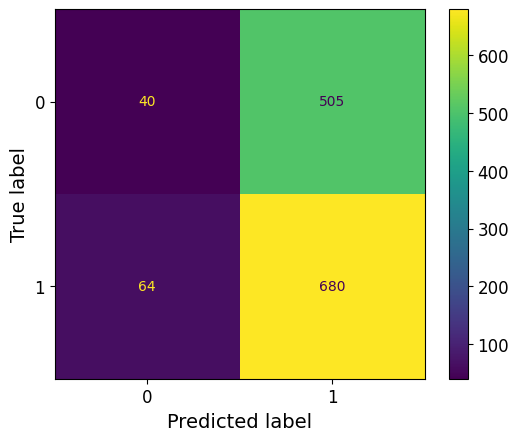

In [23]:
# RANDOM FOREST MODEL

rfc=RandomForestClassifier(random_state=123)

# Grid search
param_grid_rfc = { 
    'n_estimators': [2, 3, 5, 10],
    'max_depth': [1, 2, 3, 4],
    'min_samples_split': [2,3,4,5]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv = 5)
CV_rfc.fit(X_train, y_train)

# Display best params
print(CV_rfc.best_params_['n_estimators'])
print(CV_rfc.best_params_['max_depth'])
print(CV_rfc.best_params_['min_samples_split'])

# Build the model using the parameters
rfc1 = RandomForestClassifier(random_state=123,
                              n_estimators = CV_rfc.best_params_['n_estimators'],
                              max_depth = CV_rfc.best_params_['max_depth'],
                              min_samples_split = CV_rfc.best_params_['min_samples_split']
                              )

rfc1.fit(X_train, y_train)

pred_rfc=rfc1.predict(X_test)
pred_rfc_proba = rfc1.predict_proba(X_test) #to calculate ROC_AUC, we need model.predict_proba() instead of model.pred()
pred_rfc

print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred_rfc))

# Confusion Matrix
cm = confusion_matrix(y_test, pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc1.classes_)
disp.plot()
plt.show()


In [ ]:
# FIFTH MODEL: CHANGE THRESHOLD 

threshold = 0.50

pred_rfc_proba = rfc1.predict_proba(X_test)
predicted = (pred_rfc_proba[:,1] >= threshold).astype('int')

print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred_rfc))

# Confusion Matrix
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc1.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#From top left to bottom right
# TN = 4367, FP = 329, FN = 799, TP = 505
cm = confusion_matrix(y_test, pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc1.classes_)
disp.plot()
plt.show()

In [46]:
# FEATURE SELECTION USING RANDOM FOREST

from sklearn.feature_selection import SelectFromModel

#Getting all transformers together
ct = ColumnTransformer(transformers = misVal_transformer + conVal_transformer)
ct.fit(df_final[missingValueCols + restContinuousCols])

#defining X and y
X = ct.transform(df_final[missingValueCols + restContinuousCols])
y = df_final[nonFeatureCol].values.ravel()

# Model fit
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier())

In [50]:
# # pd.Series(sel.estimator_,feature_importances_.ravel()).hist()

# sel.get_support()

df_final.columns
X.shape
len(sel.get_support())

list(zip(df_final.columns, sel.get_support()))


[('win', True),
 ('wins_diff', True),
 ('losses_diff', False),
 ('ties_diff', False),
 ('nc_diff', True),
 ('total_matches_diff', False),
 ('height_diff', False),
 ('weight_diff', False),
 ('reach_diff', False),
 ('stance_diff', True),
 ('age_diff', True),
 ('ss_diff', True),
 ('ss_acc_diff', True),
 ('ss_abs_diff', True),
 ('ss_def_diff', True),
 ('td_diff', True),
 ('td_acc_diff', True),
 ('td_def_diff', True),
 ('sub_diff', False)]

## More Metrics for Both Classifier

In [53]:
print(f"accuracy_score_rfc: {accuracy_score(y_test, pred_rfc)}")
print(f"precision_score_rfc: {precision_score(y_test, pred_rfc)}")
print(f"recall_score_rfc: {recall_score(y_test, pred_rfc)}")
print(f"f1_score_rfc: {f1_score(y_test, pred_rfc)}")
print(f"roc_auc_score_rfc: {roc_auc_score(y_test, pred_rfc_proba[:,1])}")

accuracy_score_rfc: 0.5585725368502715
precision_score_rfc: 0.5738396624472574
recall_score_rfc: 0.9139784946236559
f1_score_rfc: 0.705028512182478
roc_auc_score_rfc: 0.4903891683930157


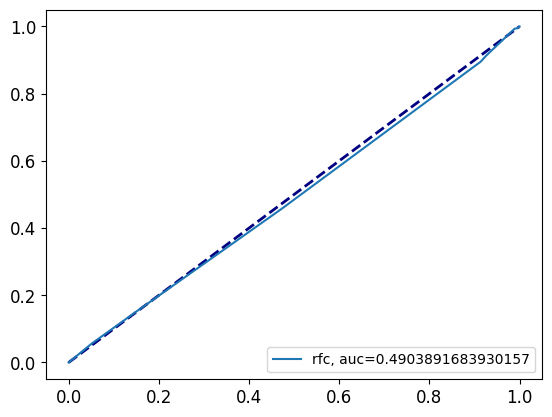

In [54]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_rfc_proba[::,1])
auc = metrics.roc_auc_score(y_test, pred_rfc_proba[::,1])
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.plot(fpr,tpr,label="rfc, auc="+str(auc))
plt.legend(loc=4)
plt.show()